## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import plotly.offline as pyo
from IPython.display import Image
import requests, six
import lxml.html as lh
import re
from itertools import cycle, islice
import warnings
warnings.filterwarnings('ignore')

# MLB 2020 Stats Web Scraping

In [2]:
def web_scrap(url):
    #Create an identifier, a page, to handle the content of the website.
    page = requests.get(url)

    #Store website content in doc.
    doc = lh.fromstring(page.content)

    #Parse the data that is stored between <tr> .. </tr> of the site's HTML code
    tr_elements = doc.xpath('//tr')

    #Check the length of the first 12 rows
    row_lenght = [len(T) for T in tr_elements[:12]]
    tr_elements = doc.xpath('//tr')

    #Create empty list
    col=[]
    i=0

    #For each row, store each first item (header) and an empty list
    for t in tr_elements[0]:
        i+=1
        name=t.text_content()
        #print(name[:len(name)//2])
        col.append([name[:len(name)//2],[]])
    col[9][0]='RBI'
    #Since our first row is the header, the data is stored in the second row onwards
    for j in range(1,len(tr_elements)):
        #T es nuestra j'th fila
        T=tr_elements[j]

        #If the row is not size 10, the // tr data is not from our table
        if len(T)!=row_lenght[0]:
            break

        #i is the index of our column
        i=0

        #Iterate through each item in the row.
        for t in T.iterchildren():
            data=t.text_content() 
            #Check if row is empty
            if i>0:
            #Convert any numeric value to integer
                try:
                    data=int(data)
                except:
                    pass
            #Add the data to the empty list of the i-th column
            col[i][1].append(data)
            #Increment i for the next column
            i+=1
    Dict = {title:column for (title,column) in col}
    return Dict

In [3]:
url='https://www.mlb.com/stats/2020'
df=pd.DataFrame(web_scrap(url))
df

,PLAYER,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
0,1JoseJ AbreuAbreu1B1‌‌‌,CWS,60,240,43,76,15,0,19,60,18,59,0,0,.317,.370,.617,.987
1,2MarcellM OzunaOzunaDH2‌‌‌,ATL,60,228,38,77,14,0,18,56,38,60,0,0,.338,.431,.636,1.067
2,3FreddieF FreemanFreeman1B3‌‌‌,ATL,60,214,51,73,23,1,13,53,45,37,2,0,.341,.462,.640,1.102
3,4LukeL VoitVoit1B4‌‌‌,NYY,56,213,41,59,5,0,22,52,17,54,0,0,.277,.338,.610,.948
4,5MannyM MachadoMachado3B5‌‌‌,SD,60,224,44,68,12,1,16,47,26,37,6,3,.304,.370,.580,.950
5,6JoseJ RamírezRamirez3B6‌‌‌,CLE,58,219,45,64,16,1,17,46,31,43,10,3,.292,.386,.607,.993
6,6MikeM TroutTroutCF6‌‌‌,LAA,53,199,41,56,9,2,17,46,35,56,1,1,.281,.390,.603,.993
7,8FernandoF Tatis Jr.TatisSS8‌‌‌,SD,59,224,50,62,11,2,17,45,27,61,11,3,.277,.366,.571,.937
8,9RafaelR DeversDevers3B9‌‌‌,BOS,57,232,32,61,16,1,11,43,13,67,0,0,.263,.310,.483,.793
9,10CharlieC BlackmonBlackmonRF10‌‌‌,COL,59,221,31,67,12,1,6,42,19,44,2,1,.303,.356,.448,.804


In [4]:
for i in range(2,26):
    url2='https://www.mlb.com/stats/2020?page='+str(i)
    df2=pd.DataFrame(web_scrap(url2))
    frames = [df,df2]
    df = pd.concat(frames)

In [5]:
df

,PLAYER,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
0,1JoseJ AbreuAbreu1B1‌‌‌,CWS,60,240,43,76,15,0,19,60,18,59,0,0,.317,.370,.617,.987
1,2MarcellM OzunaOzunaDH2‌‌‌,ATL,60,228,38,77,14,0,18,56,38,60,0,0,.338,.431,.636,1.067
2,3FreddieF FreemanFreeman1B3‌‌‌,ATL,60,214,51,73,23,1,13,53,45,37,2,0,.341,.462,.640,1.102
3,4LukeL VoitVoit1B4‌‌‌,NYY,56,213,41,59,5,0,22,52,17,54,0,0,.277,.338,.610,.948
4,5MannyM MachadoMachado3B5‌‌‌,SD,60,224,44,68,12,1,16,47,26,37,6,3,.304,.370,.580,.950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,513MasonM WilliamsWilliamsLF513‌‌‌,BAL,10,18,0,2,0,1,0,0,0,9,0,1,.111,.111,.222,.333
16,513TaylorT WilliamsWilliamsP513‌‌‌,SEA,1,0,0,0,0,0,0,0,0,0,0,0,.000,.000,.000,.000
17,513DanD WinklerWinklerP513‌‌‌,CHC,3,0,0,0,0,0,0,0,0,0,0,0,.000,.000,.000,.000
18,513PatrickP WisdomWisdom1B513‌‌‌,CHC,2,2,0,0,0,0,0,0,0,0,0,0,.000,.000,.000,.000


In [6]:
df = df.reset_index(drop=True)
df['PLAYER'] = df['PLAYER'].str.rstrip('âââ')
df.head()

,PLAYER,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
0,1JoseJ AbreuAbreu1B1‌‌‌,CWS,60,240,43,76,15,0,19,60,18,59,0,0,.317,.370,.617,.987
1,2MarcellM OzunaOzunaDH2‌‌‌,ATL,60,228,38,77,14,0,18,56,38,60,0,0,.338,.431,.636,1.067
2,3FreddieF FreemanFreeman1B3‌‌‌,ATL,60,214,51,73,23,1,13,53,45,37,2,0,.341,.462,.640,1.102
3,4LukeL VoitVoit1B4‌‌‌,NYY,56,213,41,59,5,0,22,52,17,54,0,0,.277,.338,.610,.948
4,5MannyM MachadoMachado3B5‌‌‌,SD,60,224,44,68,12,1,16,47,26,37,6,3,.304,.370,.580,.950


In [7]:
#Get the positions of the players from the 'PLAYER' column
def unique(sequence):
    seen = set()
    return [x for x in sequence if not (x in seen or seen.add(x))]
posit=[]
for i in df['PLAYER']:
    m = unique(re.findall('[A-Z][^A-Z]*', i))
    if 'X' in m[-1]:
        posit.append('X')
    elif 'C' in m[-1]:
        posit.append('C')
    elif 'P' in m[-1]:
        posit.append('P')
    else:
        m = m[-2][-1]+m[-1][0]
        posit.append(m)
df.loc[:,'POSITION'] = posit
df

,PLAYER,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS,POSITION
0,1JoseJ AbreuAbreu1B1‌‌‌,CWS,60,240,43,76,15,0,19,60,18,59,0,0,.317,.370,.617,.987,1B
1,2MarcellM OzunaOzunaDH2‌‌‌,ATL,60,228,38,77,14,0,18,56,38,60,0,0,.338,.431,.636,1.067,DH
2,3FreddieF FreemanFreeman1B3‌‌‌,ATL,60,214,51,73,23,1,13,53,45,37,2,0,.341,.462,.640,1.102,1B
3,4LukeL VoitVoit1B4‌‌‌,NYY,56,213,41,59,5,0,22,52,17,54,0,0,.277,.338,.610,.948,1B
4,5MannyM MachadoMachado3B5‌‌‌,SD,60,224,44,68,12,1,16,47,26,37,6,3,.304,.370,.580,.950,3B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,513MasonM WilliamsWilliamsLF513‌‌‌,BAL,10,18,0,2,0,1,0,0,0,9,0,1,.111,.111,.222,.333,LF
616,513TaylorT WilliamsWilliamsP513‌‌‌,SEA,1,0,0,0,0,0,0,0,0,0,0,0,.000,.000,.000,.000,P
617,513DanD WinklerWinklerP513‌‌‌,CHC,3,0,0,0,0,0,0,0,0,0,0,0,.000,.000,.000,.000,P
618,513PatrickP WisdomWisdom1B513‌‌‌,CHC,2,2,0,0,0,0,0,0,0,0,0,0,.000,.000,.000,.000,1B


In [8]:
for i in df['PLAYER']:
    i = ''.join(filter(str.isalpha,i))
    
from string import printable
for i in range(len(df)):
    df['PLAYER'][i] = ''.join(filter(str.isalpha, df['PLAYER'][i]))
    m = unique(re.findall('[A-Z][^A-Z]*', df['PLAYER'][i]))
    set(m[2]).difference(printable)

    if set(m[2]).difference(printable):
        m.pop(2)
        df['PLAYER'][i] = str(m[0]+" "+m[2])
    else:
        df['PLAYER'][i] = str(m[0]+" "+m[2])
df

,PLAYER,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS,POSITION
0,Jose Abreu,CWS,60,240,43,76,15,0,19,60,18,59,0,0,.317,.370,.617,.987,1B
1,Marcell Ozuna,ATL,60,228,38,77,14,0,18,56,38,60,0,0,.338,.431,.636,1.067,DH
2,Freddie Freeman,ATL,60,214,51,73,23,1,13,53,45,37,2,0,.341,.462,.640,1.102,1B
3,Luke Voit,NYY,56,213,41,59,5,0,22,52,17,54,0,0,.277,.338,.610,.948,1B
4,Manny Machado,SD,60,224,44,68,12,1,16,47,26,37,6,3,.304,.370,.580,.950,3B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Mason Williams,BAL,10,18,0,2,0,1,0,0,0,9,0,1,.111,.111,.222,.333,LF
616,Taylor Williams,SEA,1,0,0,0,0,0,0,0,0,0,0,0,.000,.000,.000,.000,P
617,Dan Winkler,CHC,3,0,0,0,0,0,0,0,0,0,0,0,.000,.000,.000,.000,P
618,Patrick Wisdom,CHC,2,2,0,0,0,0,0,0,0,0,0,0,.000,.000,.000,.000,1B


In [9]:
df.POSITION.value_counts()

C     95
2B    67
LF    62
RF    61
1B    58
CF    58
SS    53
3B    50
DH    48
P     39
X     29
Name: POSITION, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PLAYER    620 non-null    object
 1   TEAM      620 non-null    object
 2   G         620 non-null    int64 
 3   AB        620 non-null    int64 
 4   R         620 non-null    int64 
 5   H         620 non-null    int64 
 6   2B        620 non-null    int64 
 7   3B        620 non-null    int64 
 8   HR        620 non-null    int64 
 9   RBI       620 non-null    int64 
 10  BB        620 non-null    int64 
 11  SO        620 non-null    int64 
 12  SB        620 non-null    int64 
 13  CS        620 non-null    int64 
 14  AVG       620 non-null    object
 15  OBP       620 non-null    object
 16  SLG       620 non-null    object
 17  OPS       620 non-null    object
 18  POSITION  620 non-null    object
dtypes: int64(12), object(7)
memory usage: 92.2+ KB


In [11]:
columns = ['AVG','OBP','SLG','OPS']
df[columns] = df[columns].apply(pd.to_numeric, errors='coerce', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PLAYER    620 non-null    object 
 1   TEAM      620 non-null    object 
 2   G         620 non-null    int64  
 3   AB        620 non-null    int64  
 4   R         620 non-null    int64  
 5   H         620 non-null    int64  
 6   2B        620 non-null    int64  
 7   3B        620 non-null    int64  
 8   HR        620 non-null    int64  
 9   RBI       620 non-null    int64  
 10  BB        620 non-null    int64  
 11  SO        620 non-null    int64  
 12  SB        620 non-null    int64  
 13  CS        620 non-null    int64  
 14  AVG       620 non-null    float64
 15  OBP       620 non-null    float64
 16  SLG       620 non-null    float64
 17  OPS       620 non-null    float64
 18  POSITION  620 non-null    object 
dtypes: float64(4), int64(12), object(3)
memory usage: 92.2+ KB


In [12]:
#Saving the data in a new file in xlsx format. called: 'mlb_players_data.xlsx'
df.to_excel('mlb_players_data.xlsx',index=False)

## Stats Per Team

In [13]:
stats = df.drop(columns=['PLAYER','G'])
stats

,TEAM,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS,POSITION
0,CWS,240,43,76,15,0,19,60,18,59,0,0,0.317,0.370,0.617,0.987,1B
1,ATL,228,38,77,14,0,18,56,38,60,0,0,0.338,0.431,0.636,1.067,DH
2,ATL,214,51,73,23,1,13,53,45,37,2,0,0.341,0.462,0.640,1.102,1B
3,NYY,213,41,59,5,0,22,52,17,54,0,0,0.277,0.338,0.610,0.948,1B
4,SD,224,44,68,12,1,16,47,26,37,6,3,0.304,0.370,0.580,0.950,3B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,BAL,18,0,2,0,1,0,0,0,9,0,1,0.111,0.111,0.222,0.333,LF
616,SEA,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,P
617,CHC,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,P
618,CHC,2,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,1B


In [14]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TEAM      620 non-null    object 
 1   AB        620 non-null    int64  
 2   R         620 non-null    int64  
 3   H         620 non-null    int64  
 4   2B        620 non-null    int64  
 5   3B        620 non-null    int64  
 6   HR        620 non-null    int64  
 7   RBI       620 non-null    int64  
 8   BB        620 non-null    int64  
 9   SO        620 non-null    int64  
 10  SB        620 non-null    int64  
 11  CS        620 non-null    int64  
 12  AVG       620 non-null    float64
 13  OBP       620 non-null    float64
 14  SLG       620 non-null    float64
 15  OPS       620 non-null    float64
 16  POSITION  620 non-null    object 
dtypes: float64(4), int64(11), object(2)
memory usage: 82.5+ KB


In [15]:
stats['LEN'] =1
stats = stats.groupby(['TEAM']).sum()
stats.head()

,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS,LEN
TEAM,,,,,,,,,,,,,,,,
ARI,1846,245,438,93,11,57,241,167,436,19,4,3.581,5.056,5.968,11.025,17
ATL,2156,353,574,131,3,104,344,245,591,23,4,4.863,5.965,8.003,13.968,21
BAL,2026,274,523,102,7,77,264,164,514,19,14,4.340,5.657,7.151,12.808,21
BOS,1899,258,498,107,5,69,244,168,504,30,8,4.479,5.776,6.820,12.597,20
CHC,2090,289,457,91,9,77,263,245,611,27,11,3.780,5.401,6.450,11.850,27


In [16]:
stats.columns

Index(['AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'SB', 'CS', 'AVG',
       'OBP', 'SLG', 'OPS', 'LEN'],
      dtype='object')

In [17]:
stats[['AVG','OBP', 'SLG', 'OPS']] = stats[['AVG','OBP', 'SLG', 'OPS']].div(stats['LEN'],axis=0).round(3)

In [18]:
stats.drop(columns=['LEN'],inplace=True)
stats.reset_index(level=0, inplace=True)
stats

,TEAM,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
0,ARI,1846,245,438,93,11,57,241,167,436,19,4,0.211,0.297,0.351,0.649
1,ATL,2156,353,574,131,3,104,344,245,591,23,4,0.232,0.284,0.381,0.665
2,BAL,2026,274,523,102,7,77,264,164,514,19,14,0.207,0.269,0.341,0.610
3,BOS,1899,258,498,107,5,69,244,168,504,30,8,0.224,0.289,0.341,0.630
4,CHC,2090,289,457,91,9,77,263,245,611,27,11,0.140,0.200,0.239,0.439
5,CIN,1868,247,408,82,4,93,253,242,545,28,9,0.185,0.315,0.338,0.653
6,CLE,2027,256,461,96,6,62,240,245,530,26,11,0.183,0.272,0.285,0.557
7,COL,2174,295,560,91,18,67,277,169,566,43,10,0.239,0.287,0.374,0.661
8,CWS,2098,312,542,94,6,96,299,183,581,24,8,0.181,0.258,0.303,0.561
9,DET,1843,243,451,74,12,61,240,143,553,19,6,0.212,0.276,0.343,0.619


## Plotting Data

### Runs

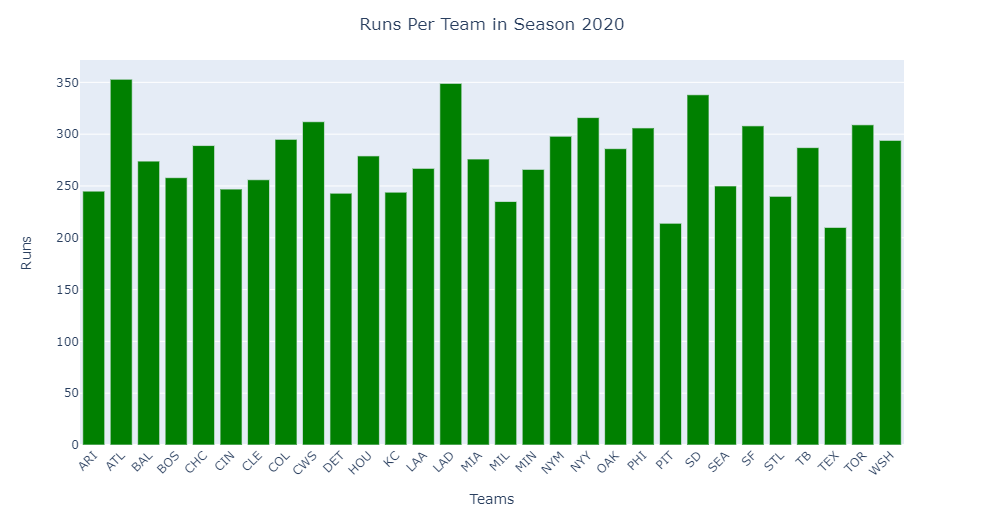

In [19]:
fig = px.bar(stats, x='TEAM', y='R')
fig.update_layout(title_text='Runs Per Team in Season 2020', title_x=0.5)
fig.update_xaxes(title='Teams',tickangle=-45)
fig.update_yaxes(title='Runs')
fig.update_traces(marker_color='green')
#fig.show()
Image(filename='Graphics/Runs Per Team in Season 2020.png') 

### Hits

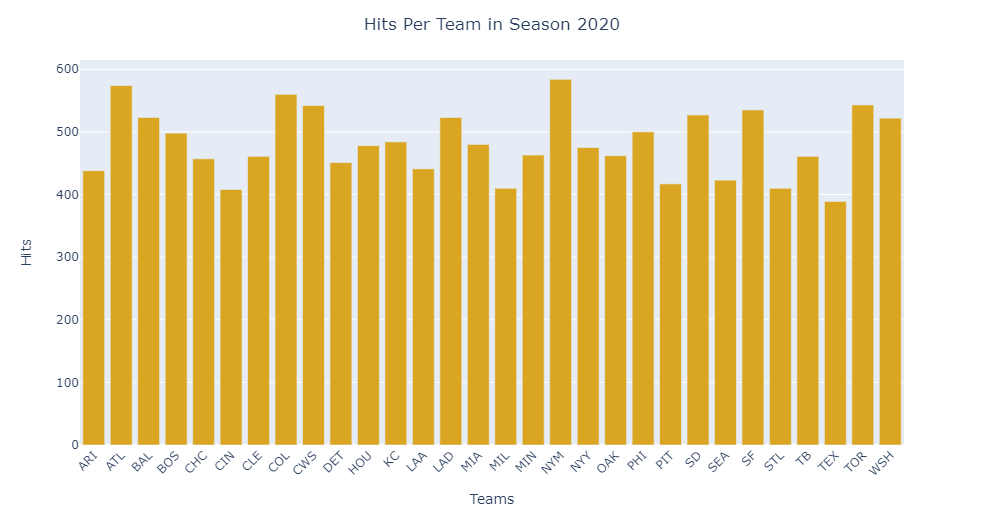

In [20]:
fig = px.bar(stats, x='TEAM', y='H')
fig.update_layout(title_text='Hits Per Team in Season 2020', title_x=0.5)
fig.update_xaxes(title='Teams',tickangle=-45)
fig.update_yaxes(title='Hits')
fig.update_traces(marker_color='goldenrod')
#fig.show()
Image(filename='Graphics/Hits Per Team in Season 2020.png')

### Doubles

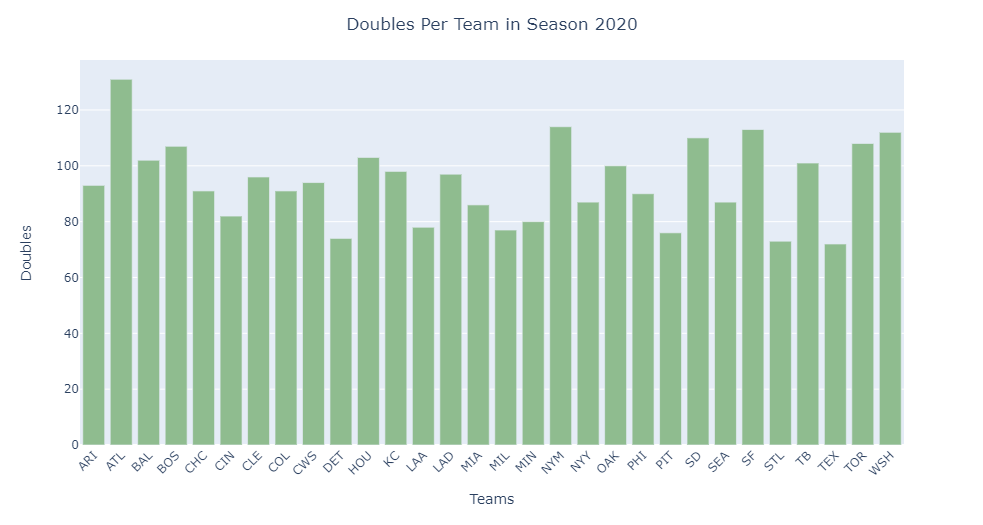

In [21]:
fig = px.bar(stats, x='TEAM', y='2B')
fig.update_layout(title_text='Doubles Per Team in Season 2020', title_x=0.5)
fig.update_xaxes(title='Teams',tickangle=-45)
fig.update_yaxes(title='Doubles')
fig.update_traces(marker_color='darkseagreen')
#fig.show()
Image(filename='Graphics/Doubles Per Team in Season 2020.png')

### Triples

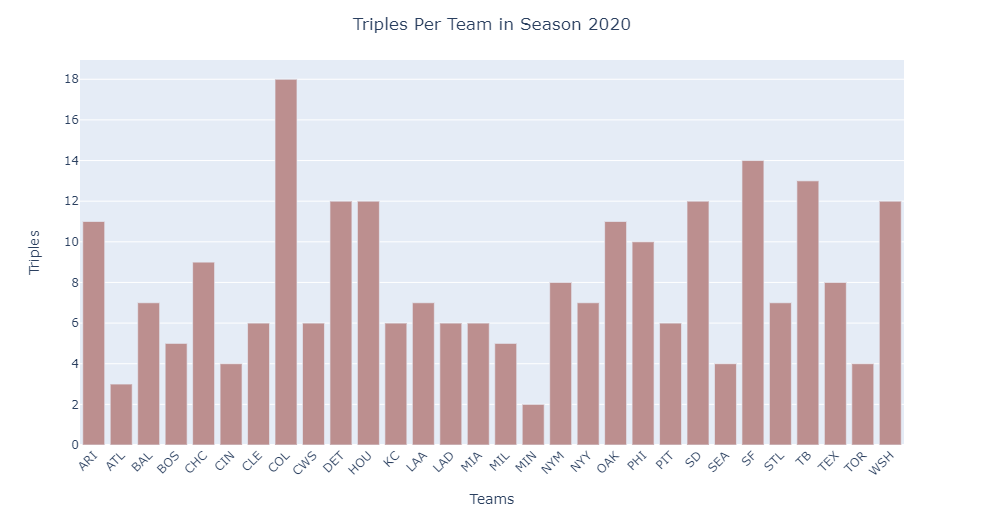

In [22]:
fig = px.bar(stats, x='TEAM', y='3B')
fig.update_layout(title_text='Triples Per Team in Season 2020', title_x=0.5)
fig.update_xaxes(title='Teams',tickangle=-45)
fig.update_yaxes(title='Triples')
fig.update_traces(marker_color='rosybrown')
#fig.show()
Image(filename='Graphics/Triples Per Team in Season 2020.png')

### Home Runs

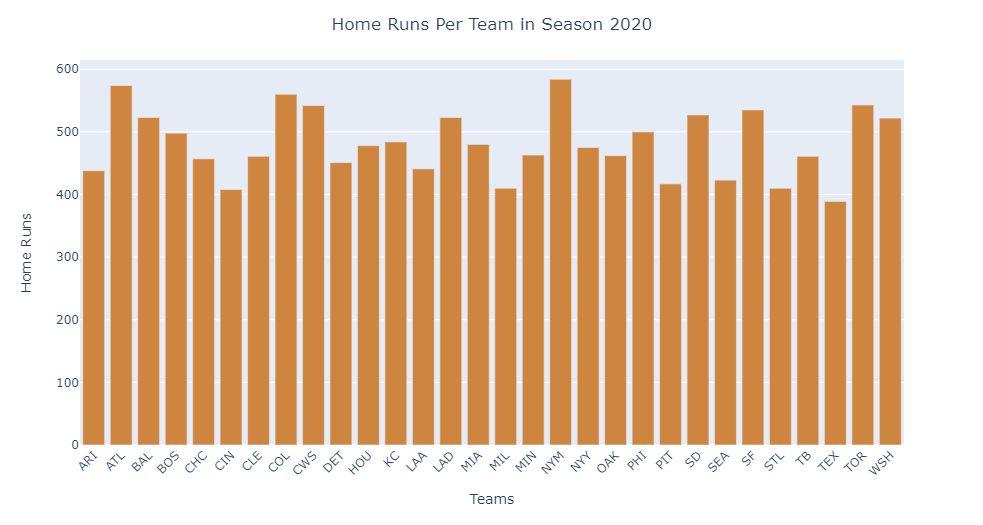

In [23]:
fig = px.bar(stats, x='TEAM', y='H')
fig.update_layout(title_text='Home Runs Per Team in Season 2020', title_x=0.5)
fig.update_xaxes(title='Teams',tickangle=-45)
fig.update_yaxes(title='Home Runs')
fig.update_traces(marker_color='peru')
#fig.show()
Image(filename='Graphics/Home Runs Per Team in Season 2020.png')

### Runs Batted In

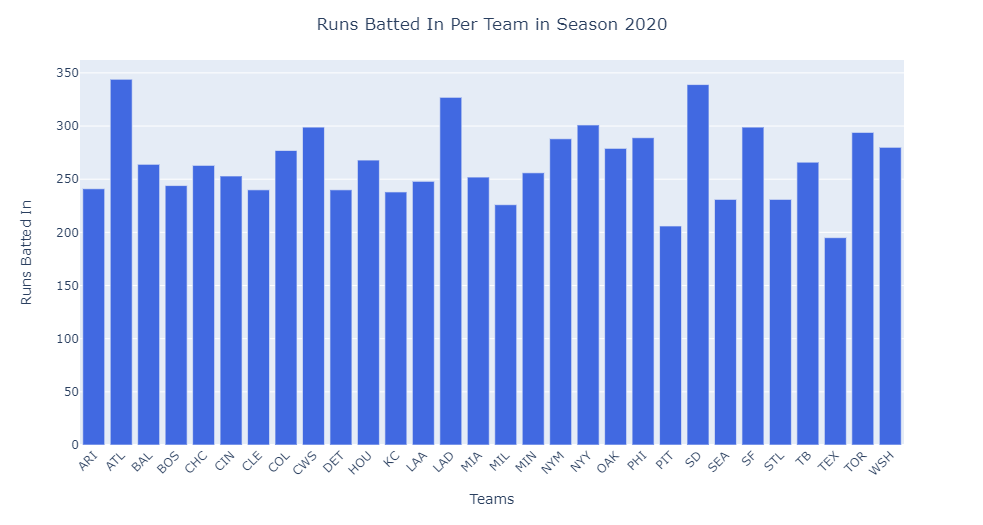

In [24]:
fig = px.bar(stats, x='TEAM', y='RBI')
fig.update_layout(title_text='Runs Batted In Per Team in Season 2020', title_x=0.5)
fig.update_xaxes(title='Teams',tickangle=-45)
fig.update_yaxes(title='Runs Batted In')
fig.update_traces(marker_color='royalblue')
#fig.show()
Image(filename='Graphics/Runs Batted In Per Team in Season 2020.png')

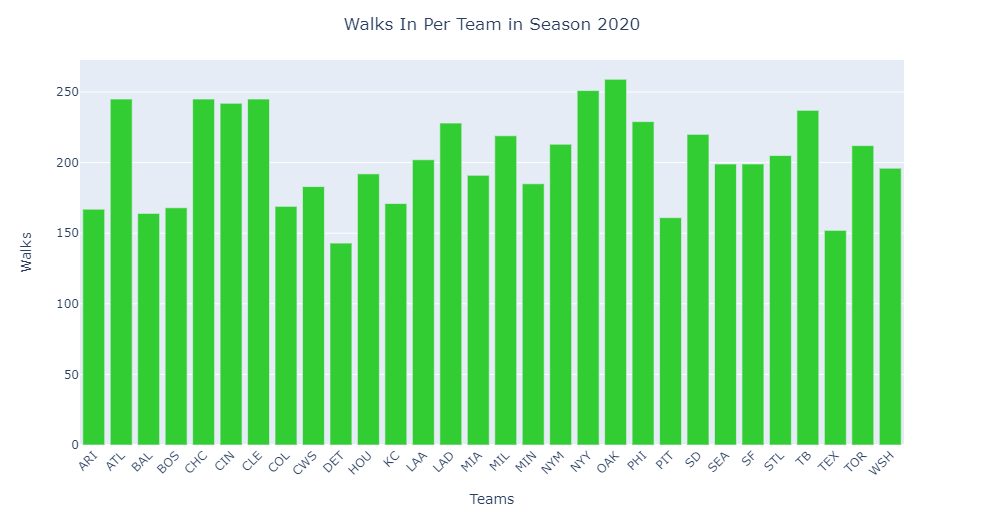

In [25]:
fig = px.bar(stats, x='TEAM', y='BB')
fig.update_layout(title_text='Walks In Per Team in Season 2020', title_x=0.5)
fig.update_xaxes(title='Teams',tickangle=-45)
fig.update_yaxes(title='Walks')
fig.update_traces(marker_color='limegreen')
#fig.show()
Image(filename='Graphics/Walks In Per Team in Season 2020.png')

### Strikeouts

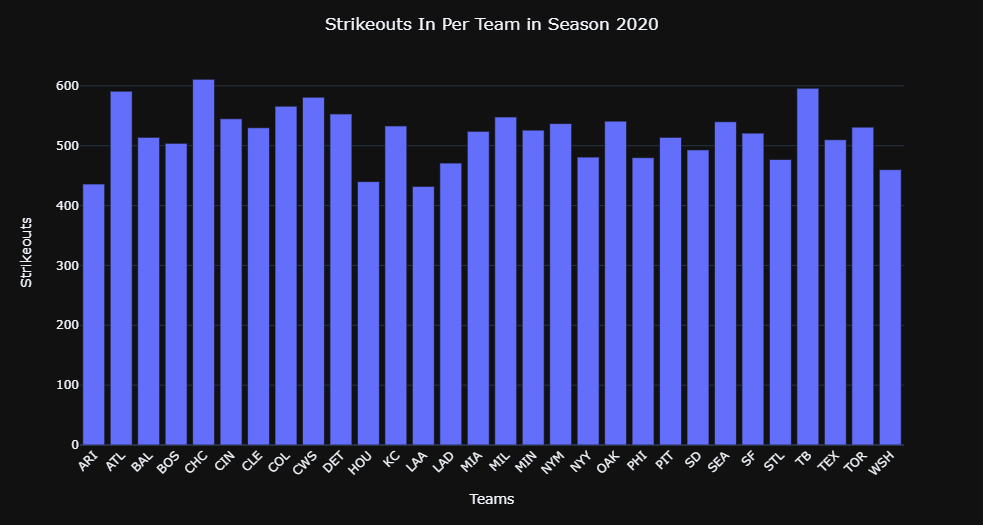

In [26]:
fig = px.bar(stats, x='TEAM', y='SO')
fig.update_layout(template='plotly_dark',title_text='Strikeouts In Per Team in Season 2020', title_x=0.5)
fig.update_xaxes(title='Teams',tickangle=-45)
fig.update_yaxes(title='Strikeouts')
#fig.show()
Image(filename='Graphics/Strikeouts In Per Team in Season 2020.png')

### Radar Chart for percentage statistics

In [27]:
list_stats = stats.values.tolist()
statistics = dict()
for i in range(len(list_stats)):
    lista=[]
    for j in range(2,len(list_stats[0])):
        lista.append(list_stats[i][j])
    statistics[list_stats[i][0]] = lista

In [28]:
categories = list(stats)[12:]
categories = np.concatenate((categories, [categories[0]]))

metrics={}
for i in stats['TEAM']:
    metrics['{0}'.format(i)] = np.concatenate((statistics[i][10::], [statistics[i][10]]))

In [29]:
metrics

{'ARI': array([0.211, 0.297, 0.351, 0.649, 0.211]),
 'ATL': array([0.232, 0.284, 0.381, 0.665, 0.232]),
 'BAL': array([0.207, 0.269, 0.341, 0.61 , 0.207]),
 'BOS': array([0.224, 0.289, 0.341, 0.63 , 0.224]),
 'CHC': array([0.14 , 0.2  , 0.239, 0.439, 0.14 ]),
 'CIN': array([0.185, 0.315, 0.338, 0.653, 0.185]),
 'CLE': array([0.183, 0.272, 0.285, 0.557, 0.183]),
 'COL': array([0.239, 0.287, 0.374, 0.661, 0.239]),
 'CWS': array([0.181, 0.258, 0.303, 0.561, 0.181]),
 'DET': array([0.212, 0.276, 0.343, 0.619, 0.212]),
 'HOU': array([0.221, 0.286, 0.382, 0.668, 0.221]),
 'KC': array([0.219, 0.288, 0.344, 0.632, 0.219]),
 'LAA': array([0.23 , 0.304, 0.362, 0.666, 0.23 ]),
 'LAD': array([0.211, 0.27 , 0.4  , 0.671, 0.211]),
 'MIA': array([0.228, 0.293, 0.331, 0.624, 0.228]),
 'MIL': array([0.2  , 0.277, 0.338, 0.615, 0.2  ]),
 'MIN': array([0.233, 0.31 , 0.411, 0.721, 0.233]),
 'NYM': array([0.245, 0.303, 0.383, 0.685, 0.245]),
 'NYY': array([0.22 , 0.294, 0.367, 0.661, 0.22 ]),
 'OAK': array

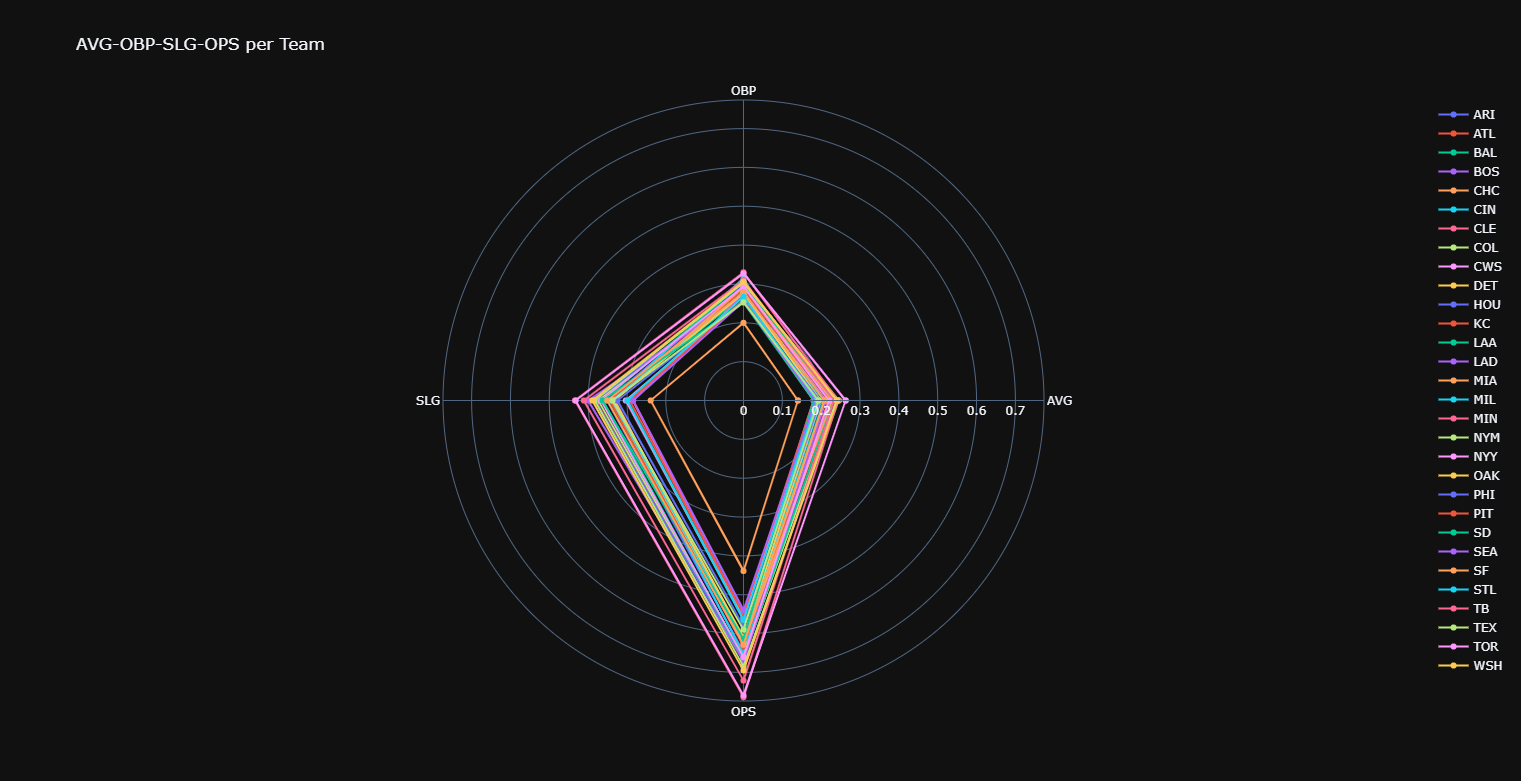

In [30]:
#ax.set_ylim(0.9, 1)
data=[]
for i in metrics:
    data.append(go.Scatterpolar(r=metrics[i], theta=categories, name=i))
    
fig = go.Figure(
    data=data,
    layout=go.Layout(
        template='plotly_dark',
        title=go.layout.Title(text='AVG-OBP-SLG-OPS per Team'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

#pyo.plot(fig)
Image(filename='Graphics/AVG-OBP-SLG-OPS per Team.png') 

In [31]:
#Saving the data in a new file in xlsx format. called: 'mlb_teams_data.xlsx'
stats.to_excel('mlb_teams_data.xlsx',index=False)